# Introduction to Seaborn

In the previous lecture, we have learnt about Matplotlib, a Python visualization library, and some useful ways of making plots like `plt.hist()` and `plt.plot()`, and some attributes to improve the graph aesthetically, such as `plt.legend()`, `plt.axvline()`, and `plt.axhline()`. In this lecture we will introduce another visualization library called **Seaborn**. Seaborn is a Python module that's actually based on Matplotlib, but has many extra features with a particular focus on drawing attrative statistical graphics plottings, such as histogram, probability density plots, regression plots, cumulative distribution function plots, box plots, and so on. Seaborn makes creating plots very efficient. Therefore with Seaborn you can generate attractive plots with code that is 5 times less than with Matplotlib. Because the course focuses on developing Bayesian statistical techniques on analyzing and simulating real-life problems, Seaborn is a powerful tool given its wide coverage for statistical tasks and the sheer amount of built-in graphical functions.



# Breakdown of Seaborn Plots
![](/assets/seaborn_plot.png)

As you can see, there are three fundamental types of statistical plots that Seaborn can make for users. First, the relational plot could be made through the syntax `sns.relplot()`, which takes two or more variables at the same time and visualizes the patterns that describe the relationship between those variables. Such relationships could be shown in the form of scatterplot using `sns.scatterplot()`, or lineplot using `sns.lineplot()`, depending on the question one is going to answer. Both are under the category of relational plot. 

Second, the seaborn package can visualize discrete and continuous distributions using histogram using the syntax `sns.histplot()`, probability density plot using the syntax `sns.kdeplot()`, cumulative distribution function plot using the syntax `sns.ecdfplot()`, and rugplot using the syntax `sns.rugplot()`. 

Third, seaborn visualizes the distribution of categorical data (also called qualitative data) using several specialized approaches under the syntax `sns.catplot()` as the generic name for categorical plots. An example of visualizing categorical variable is about showing the distributions about students who rate 5 stars, 4 stars, 3 stars, 2 stars and 1 star for different Massive Open Online Courses. We can make categorical scatterplots such as stripplot using the syntax `sns.stripplot()` and swarmplot using the syntax `sns.swarmplot()`, distribution plots such as boxplot using the syntax `sns.boxplot()` and violinplot using the syntax `sns.violinplot()`, as well as point estimate plots and bar plots using `sns.pointplot()` and `sns.barplot()` functions respectively.

Now, let's see some examples of how to use Seaborn to create statistical graphics.

In [ ]:
# Let's import some census data. This data is stored in the file census.csv which is collected by the United States Census Bureau 
# to record the population, migration, birth, death and many levels of demographic data for each U.S. county. 
# So it's a great example to show how to understand the population better by making various types of statistical visualizations. 

# Let's import seaborn, numpy and pandas and read in the dataset
import seaborn as sns
import numpy as np
import pandas as pd 
census = pd.read_csv('assets/census.csv')
# Let's see the first 10 rows of the data
census.head(10)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


Mean County Population:  98262.03564608529
Median County Population:  25872.0
Max County Population:  9818605


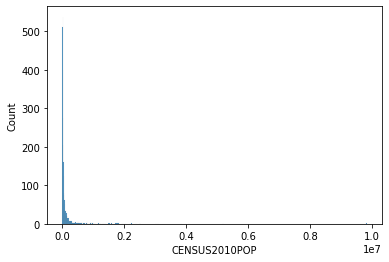

In [ ]:
# As we are interested in understanding the characteristics about the U.S. counties by plotting
# the population distribution in county level
# So we subset the counties by filtering rows where SUMLEV equals 50
census = census[census['SUMLEV'] == 50]
# and plot the distribution of census population in 2010. So we pass through the dataset with the 2010 census population in sns.histplot
sns.histplot(census['CENSUS2010POP'])
# plt.ticklabel_format(style='plain', axis='y')

# In this histogram, we find that the population in county level spread from a very small number less than a million to approximately 10 millions, but a vast majority
# of counties have just tiny amount of population so data points cluster at the lower end. Some people are more interested in understanding 
# the median during the daily life, like comparing housing prices and salaries from different geographical areas, because median may better 
# reflect the central tendency than the mean, which is particularly susceptible to extremely large and small numerical values. 

# It's always a good practice to check summary statistics at the same time you are making graphs. In this case, I used
# np.mean, np.median, and np.max to understand the mean value, median country population, as well as the largest population size among all counties.
print("Mean County Population: ", np.mean(census['CENSUS2010POP']))
print("Median County Population: ", np.median(census['CENSUS2010POP']))
print("Max County Population: ", np.max(census['CENSUS2010POP']))

# So we are informed that the median county population is roughly 3 times smaller than the mean county population, because
# the mean value is escalated significantly due to some mega counties in the U.S. such as the Cook County and Los Angeles County, etc.
# We would use the statistical term right skewed to describe the case when the mean is larger than the median, and it's typially true 
# for describing the population distribution.


<AxesSubplot:xlabel='CENSUS2010POP', ylabel='Count'>

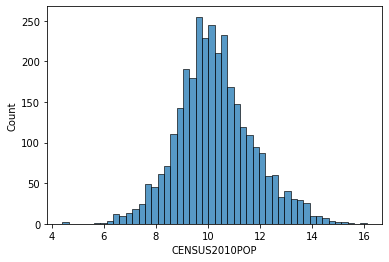

In [ ]:
# (Option Section)
# Log-Scale
sns.histplot(np.log(census['CENSUS2010POP']))

<AxesSubplot:xlabel='CENSUS2010POP'>

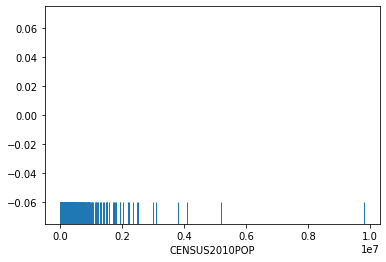

In [ ]:
# To get a sense of where do the actually county populations locate, we can look at the rugplot 
# A rugplot uses perpendicular markers to show every single data point on the x-axis. I added the height option so that the markers are conspicuous. 
sns.rugplot(x = census['CENSUS2010POP'], height = 0.1)
# You can see that it looks like an one-dimensional scatter plot. 
# The benefit of it is that it shows every value in a distribution, not just the smoothed density
# Interpreting a rugplot is just analogous to counting frequencies in a histogram.
# The dense markers clustered at the lower end of the x-axis indicate that a majority of counties have small populations. 
# Looking at the x-axis between 2 to 10 million, the data point becomes sparse, meaning only a few counties recorded 2 million or more population in 2010.
# So again, the distribution is skewed to the right. Of course, we believe that the largest and smallest counties are formed due to its are size, 
# its geographical locations and various historical reasons, but it's outside the scope of this course.

# Ps: The least populated county is Kalawao County, Hawaii with only 86 people

# A rug plot is a compact way of illustrating the marginal distributions of a variable along x and y. 


<AxesSubplot:xlabel='CENSUS2010POP'>

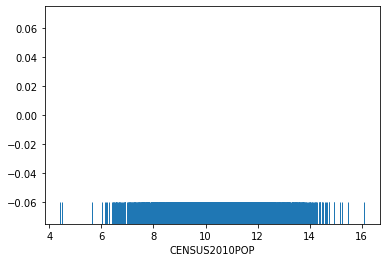

In [ ]:
sns.rugplot(x = np.log(census['CENSUS2010POP']), height = 0.1)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RNATURALINC2011', ylabel='Density'>

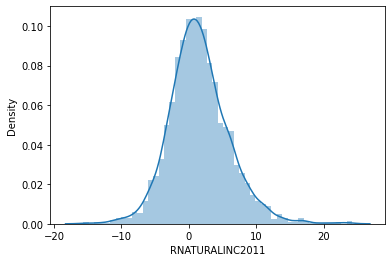

In [ ]:
# Alternatively, we can plot a distribution using sns.distplot function, but this time we want to look at the 
# natural population growth rate (which is total birth subtracted by total death, over the county population) in each county in 2011.

sns.distplot(census['RNATURALINC2011'])
# The graph made by sns.distplot is a probability density plot. Look at the shape of the graph, it actually
# resembles a bell, thereby it's technically called the bell curve. 

# Looking at the x-axis and y-axis, we found that there is higher chance that the natural growth rate of county population
# is closed to 0, which means the overall U.S. population should remain largely unchanged in 2011. 
# You will also notice that the density (y-axis) tapers off on both sides with a center around 0. So for example,
# the density corresponding negative 10 and 10 are less than 0.01. Since the density represents a relative
# sense of how likely you'll see counties with that natural growth rate, it means it's more likely that a
# county will record a small proportion change in population than record an increase or decrease of more than 
# 10 percent.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RNATURALINC2015', ylabel='Density'>

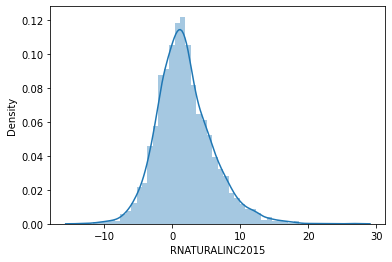

In [ ]:
# Let's explore if the natural population growth rate would change significantly after a few years.
# So we make the same probability density plot for the 2015 natural population growth rate data.
sns.distplot(census['RNATURALINC2015'])

# As you can see, the shape and the spread of the graph remain largely unchanged. In fact, if you check the
# natural population growth rate from 2011 to 2015, the population growth rate does not witness a great 
# surge or downtown during the 5 years. If you are curious enough, you can find the World Bank data, where
# statistics show that the fertility rate in the U.S. actually reduced slightly from 1.89 births per woman to 
# 1.84 births per woman in 2015.

# In Bayesian perspective, this knowledge can to some extent, convince
# you a belief that the natural population growth rate in the U.S. is constant in recent years. Again, when 
# new data comes in, based on the Bayes' rule, we can update our belief, meaning we may strengthen the belief
# if the new data suggests the same situation, or change the belief either if the new data suggests a big leap or 
# big recession in population growth rate.

<AxesSubplot:xlabel='CENSUS2010POP', ylabel='NETMIG2010'>

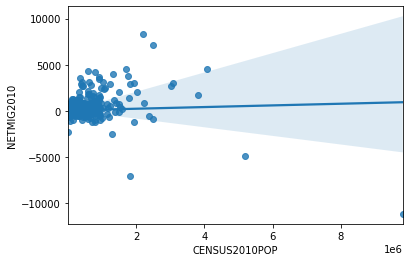

In [ ]:
# Cool! Now let's say you are analyzing the immigration-emigration trend in the U.S. counties.
# You know that urbanization has led to mass movement of people to cities to create better job opportunities and spur economic growth.
# Before hastily reaching to the conclusion, a question that you want to examine is: Do more people tend to move into big counties?
# To examine the relationship between population and number of people immigrating, we can use the regplot in seaborn.
sns.regplot(x='CENSUS2010POP', y='NETMIG2010', data=census)
# It does not look very great unfortunately. 


Text(0.5, 1.0, 'Relationship of county population and migration')

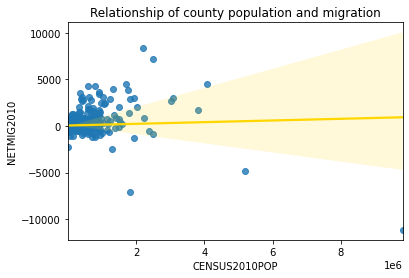

In [ ]:
# Fortunately, Seaborn's regplot function accepts additional parameters to customize the graph. 
# So you can change the line color for example using the line_kws option and the color parameter. 
# Let's go ahead and change the color to green. 
migration = sns.regplot(x='CENSUS2010POP', y='NETMIG2010', line_kws={"color": "gold"}, data=census)
migration.set_title("Relationship of county population and migration")
# That looks much clearer. The output of this one line of code is a scatter plot with a 
# regression line and not just that, but also should approximately 2 standard deviation above and below the estimate.
# Really looking to the plot we'll see a slightly increase in the net migration when population increase.
# That confirms the general argument about population shift to urban area. But counterintuitively, the most populated 
# counties recorded negative influx of people as of 2010. That's quite an interesting finding about population.

So in this lecture we learned the Seaborn package, its categorization and its application on building plots for a census population data. With this we conclude our short introduction to Seaborn for statistical plots. Let's open the notebook to do some hands-on practice pandas, matplotlib and seaborn. (Optional) Research shows that coding is best learned by doing. It's beneficial to code by hand and actively ask questions for help, but don't just read the sample code. That's it for the first week, I'll see you in the next video!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d164461f-c4b7-4df2-b711-3a9e5e978d4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>